In [46]:
from datetime import datetime   # 패키지 - 모듈 (이름 같음)
import pandas as pd   # csv file read
import matplotlib.pyplot as plt   # 시계열 시각화
from sklearn.preprocessing import LabelEncoder # 인코딩

plt.rcParams['font.family'] ='Malgun Gothic'

plt.rcParams['axes.unicode_minus'] =False

In [2]:
df = pd.read_csv("C:/Users/yjhon/OneDrive/바탕 화면/조달청_공모전/Regression/물품,용역,공사_20172021.xls")
df.shape

(1059039, 17)

In [3]:
df['공고게시일자'] = df['공고게시일자'].astype(str)

In [62]:
df[df.수요기관명=="강동경희대학교병원"]

,등록유형,공고게시일자,조달구분,입찰공고차수,수요기관명,수요기관코드,긴급공고여부,정정공고여부,취소공고여부,추정가격,...,낙찰자결정방법,입찰계약방법,예가방법,업종제한내용,지역제한내용,대상,입찰계약방법축소,week,Month,YEAR
122881,나라장터(G2B),2017-11-16,자체조달,0,강동경희대학교병원,Z015737,Y,N,N,0.000000e+00,...,최저제,제한경쟁,단일예가,[시설물유지관리업(0035)],"서울특별시[11000], 경기도[41000], 인천광역시[28000]",공사,제한경쟁,46,11,2017
249965,나라장터(G2B),2017-11-16,자체조달,0,강동경희대학교병원,Z015737,Y,N,N,0.000000e+00,...,최저제,제한경쟁,단일예가,[시설물유지관리업(0035)],"서울특별시[11000], 경기도[41000], 인천광역시[28000]",공사,제한경쟁,46,11,2017
463111,나라장터(G2B),2020-06-19,자체조달,0,강동경희대학교병원,Z015737,N,N,N,0.000000e+00,...,최저제,제한경쟁,단일예가,[전기공사업(0037)],"서울특별시[11000], 경기도[41000], 인천광역시[28000]",공사,제한경쟁,25,6,2020
463829,나라장터(G2B),2020-06-30,자체조달,1,강동경희대학교병원,Z015737,N,Y,N,0.000000e+00,...,최저제,제한경쟁,단일예가,[전기공사업(0037) 과 일반소방시설공사업(전기)(0039)],"서울특별시[11000], 경기도[41000]",공사,제한경쟁,27,6,2020
756551,나라장터(G2B),2021-10-08,자체조달,0,강동경희대학교병원,Z015737,Y,N,N,1.111111e+09,...,기타(수기입찰),제한(총액),단일예가,[의약품판매업(의약품도매상)(5307)],서울특별시[11000],물품,제한,40,10,2021
756830,나라장터(G2B),2021-10-22,자체조달,0,강동경희대학교병원,Z015737,Y,N,N,1.111111e+09,...,기타(수기입찰),제한(총액),단일예가,[의약품판매업(의약품도매상)(5307)],서울특별시[11000],물품,제한,42,10,2021
985463,나라장터(G2B),2020-09-10,자체조달,1,강동경희대학교병원,Z015737,Y,Y,N,1.111111e+09,...,협상에 의한 낙찰제,제한(총액)협상에의한계약,단일예가,[마약류도매업자(5318) 과 마약류관리자(5319)],서울특별시[11000],용역,제한,37,9,2020
1011431,나라장터(G2B),2021-04-14,자체조달,0,강동경희대학교병원,Z015737,Y,N,N,1.111111e+09,...,기타(수기입찰),제한(총액)2단계경쟁,단일예가,[의료기관세탁물처리업(1185)],"서울특별시[11000], 인천광역시[28000], 경기도[41000]",용역,제한,15,4,2021
1028996,나라장터(G2B),2021-09-24,자체조달,0,강동경희대학교병원,Z015737,N,N,N,1.111111e+09,...,기타(수기입찰),제한(총액),단일예가,[소프트웨어사업자(컴퓨터관련서비스사업)(1468)],"서울특별시[11000], 인천광역시[28000], 경기도[41000]",용역,제한,38,9,2021
1044172,나라장터(G2B),2021-11-29,자체조달,1,강동경희대학교병원,Z015737,N,Y,N,1.111111e+09,...,협상에 의한 낙찰제,제한(총액)협상에의한계약,단일예가,[시설경비업(1164)],"서울특별시[11000], 인천광역시[28000], 경기도[41000]",용역,제한,48,11,2021


In [5]:
df['공고게시일자'] = pd.to_datetime(df['공고게시일자'])

In [6]:
df.isnull().sum()

등록유형       0
공고게시일자     0
조달구분       0
입찰공고차수     0
수요기관명      0
수요기관코드     0
긴급공고여부     0
정정공고여부     0
취소공고여부     0
추정가격       0
입찰방식       0
낙찰자결정방법    0
입찰계약방법     0
예가방법       0
업종제한내용     0
지역제한내용     0
대상         0
dtype: int64

In [7]:
#df['공고게시일자'] = df['공고게시일자'].dt.tz_localize('UTC')

In [8]:
print(df['공고게시일자'])

0         2017-01-02
1         2017-01-02
2         2017-01-02
3         2017-01-02
4         2017-01-02
             ...    
1059034   2021-12-22
1059035   2021-12-23
1059036   2021-12-23
1059037   2021-12-23
1059038   2021-12-27
Name: 공고게시일자, Length: 1059039, dtype: datetime64[ns]


In [9]:
df['입찰계약방법축소'] = df.입찰계약방법.str.split('(').str[0]

In [10]:
df

,등록유형,공고게시일자,조달구분,입찰공고차수,수요기관명,수요기관코드,긴급공고여부,정정공고여부,취소공고여부,추정가격,입찰방식,낙찰자결정방법,입찰계약방법,예가방법,업종제한내용,지역제한내용,대상,입찰계약방법축소
0,나라장터(G2B),2017-01-02,자체조달,1,경상남도합천교육청 합천중학교,9220014,Y,N,Y,61303000.0,전자입찰,수의(견적제출),수의(소액),복수예가,[금속구조물·창호·온실공사업(1440)],"경상남도 합천군[48890], 경상남도 거창군[48880]",공사,수의
1,나라장터(G2B),2017-01-02,자체조달,1,경기도 양주시,5590000,N,N,Y,63636364.0,전자입찰,수의(견적제출),수의(소액)(단가),복수예가,[금속구조물·창호·온실공사업(1440)],경기도 양주시[41630],공사,수의
2,나라장터(G2B),2017-01-02,자체조달,2,경상북도안동교육청 경안여자중학교,8790030,N,N,Y,25040000.0,전자입찰,"추정가격 8천만원미만(전기통신,소방시설,문화재 등)",지역제한,복수예가,[전기공사업(0037)],경상북도 안동시[47170],공사,지역제한
3,나라장터(G2B),2017-01-02,자체조달,0,경기도교육청 광동고등학교,7530542,N,N,N,6570000.0,전자입찰,추정가격 1억원미만(전문),수의(소액),복수예가,[기계설비공사업(0017)],"경기도 남양주시[41360], 경기도 구리시[41310]",공사,수의
4,나라장터(G2B),2017-01-02,자체조달,0,경상남도 양산시,5380000,Y,N,N,46411819.0,전자입찰,수의(견적제출),수의(소액),복수예가,[석공사업(0009)],경상남도 양산시[48330],공사,수의
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059034,나라장터(G2B),2021-12-22,중앙조달,0,경상남도 거제시,5370000,Y,N,N,346694545.0,전자입찰,협상에 의한 낙찰자 결정,제한(총액)협상에의한계약,비예가,[소프트웨어사업자(컴퓨터관련서비스사업)(1468) 과 정보통신공사업(0036)],경상남도[48000],용역,제한
1059035,나라장터(G2B),2021-12-23,중앙조달,0,부산광역시 상수도사업본부,6260095,Y,N,N,191970909.0,전자입찰,협상에 의한 낙찰자 결정,제한(총액)협상에의한계약,비예가,[소프트웨어사업자(컴퓨터관련서비스사업)(1468) 과 정보통신공사업(0036)],부산광역시[26000],용역,제한
1059036,나라장터(G2B),2021-12-23,중앙조달,0,한국생명공학연구원,Z004836,Y,N,N,132727273.0,전자입찰,협상에 의한 낙찰자 결정,제한(총액)협상에의한계약,비예가,[소프트웨어사업자(컴퓨터관련서비스사업)(1468)],대전광역시[30000],용역,제한
1059037,나라장터(G2B),2021-12-23,중앙조달,0,제주특별자치도 서귀포시,6520000,Y,N,N,137493636.0,전자입찰,협상에 의한 낙찰자 결정,제한(총액)협상에의한계약,비예가,[소프트웨어사업자(컴퓨터관련서비스사업)(1468)],제주특별자치도[50000],용역,제한


In [11]:
#df['year'] = df['공고게시일자'].dt.strftime('%Y')
#df['month'] = df['공고게시일자'].dt.strftime('%m')
df.columns

Index(['등록유형', '공고게시일자', '조달구분', '입찰공고차수', '수요기관명', '수요기관코드', '긴급공고여부',
       '정정공고여부', '취소공고여부', '추정가격', '입찰방식', '낙찰자결정방법', '입찰계약방법', '예가방법',
       '업종제한내용', '지역제한내용', '대상', '입찰계약방법축소'],
      dtype='object')

In [12]:
df['week']=df['공고게시일자'].dt.week


df.sort_values(by=['공고게시일자'], axis=0, ascending=True)


df.loc[95000]

C:\Users\yjhon\AppData\Local\Temp/ipykernel_17548/3997435559.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week']=df['공고게시일자'].dt.week


등록유형                                나라장터(G2B)
공고게시일자                    2017-10-17 00:00:00
조달구분                                     자체조달
입찰공고차수                                      0
수요기관명                      대한적십자사 대전 세종 충남혈액원
수요기관코드                                Z003338
긴급공고여부                                      N
정정공고여부                                      N
취소공고여부                                      N
추정가격                              296572728.0
입찰방식                                     전자입찰
낙찰자결정방법                  추정가격 3억원미만 1억원이상(전문)
입찰계약방법                                   지역제한
예가방법                                     복수예가
업종제한내용      [건축공사업(0002)]업종 또는[토목건축공사업(0003)]
지역제한내용                           대전광역시[30000]
대상                                         공사
입찰계약방법축소                                 지역제한
week                                       42
Name: 95000, dtype: object

In [65]:
df[df.수요기관명=="강동경희대학교병원"]

,등록유형,공고게시일자,조달구분,입찰공고차수,수요기관명,수요기관코드,긴급공고여부,정정공고여부,취소공고여부,추정가격,...,낙찰자결정방법,입찰계약방법,예가방법,업종제한내용,지역제한내용,대상,입찰계약방법축소,week,Month,YEAR
122881,나라장터(G2B),2017-11-16,자체조달,0,강동경희대학교병원,Z015737,Y,N,N,0.000000e+00,...,최저제,제한경쟁,단일예가,[시설물유지관리업(0035)],"서울특별시[11000], 경기도[41000], 인천광역시[28000]",공사,제한경쟁,46,11,2017
249965,나라장터(G2B),2017-11-16,자체조달,0,강동경희대학교병원,Z015737,Y,N,N,0.000000e+00,...,최저제,제한경쟁,단일예가,[시설물유지관리업(0035)],"서울특별시[11000], 경기도[41000], 인천광역시[28000]",공사,제한경쟁,46,11,2017
463111,나라장터(G2B),2020-06-19,자체조달,0,강동경희대학교병원,Z015737,N,N,N,0.000000e+00,...,최저제,제한경쟁,단일예가,[전기공사업(0037)],"서울특별시[11000], 경기도[41000], 인천광역시[28000]",공사,제한경쟁,25,6,2020
463829,나라장터(G2B),2020-06-30,자체조달,1,강동경희대학교병원,Z015737,N,Y,N,0.000000e+00,...,최저제,제한경쟁,단일예가,[전기공사업(0037) 과 일반소방시설공사업(전기)(0039)],"서울특별시[11000], 경기도[41000]",공사,제한경쟁,27,6,2020
756551,나라장터(G2B),2021-10-08,자체조달,0,강동경희대학교병원,Z015737,Y,N,N,1.111111e+09,...,기타(수기입찰),제한(총액),단일예가,[의약품판매업(의약품도매상)(5307)],서울특별시[11000],물품,제한,40,10,2021
756830,나라장터(G2B),2021-10-22,자체조달,0,강동경희대학교병원,Z015737,Y,N,N,1.111111e+09,...,기타(수기입찰),제한(총액),단일예가,[의약품판매업(의약품도매상)(5307)],서울특별시[11000],물품,제한,42,10,2021
985463,나라장터(G2B),2020-09-10,자체조달,1,강동경희대학교병원,Z015737,Y,Y,N,1.111111e+09,...,협상에 의한 낙찰제,제한(총액)협상에의한계약,단일예가,[마약류도매업자(5318) 과 마약류관리자(5319)],서울특별시[11000],용역,제한,37,9,2020
1011431,나라장터(G2B),2021-04-14,자체조달,0,강동경희대학교병원,Z015737,Y,N,N,1.111111e+09,...,기타(수기입찰),제한(총액)2단계경쟁,단일예가,[의료기관세탁물처리업(1185)],"서울특별시[11000], 인천광역시[28000], 경기도[41000]",용역,제한,15,4,2021
1028996,나라장터(G2B),2021-09-24,자체조달,0,강동경희대학교병원,Z015737,N,N,N,1.111111e+09,...,기타(수기입찰),제한(총액),단일예가,[소프트웨어사업자(컴퓨터관련서비스사업)(1468)],"서울특별시[11000], 인천광역시[28000], 경기도[41000]",용역,제한,38,9,2021
1044172,나라장터(G2B),2021-11-29,자체조달,1,강동경희대학교병원,Z015737,N,Y,N,1.111111e+09,...,협상에 의한 낙찰제,제한(총액)협상에의한계약,단일예가,[시설경비업(1164)],"서울특별시[11000], 인천광역시[28000], 경기도[41000]",용역,제한,48,11,2021


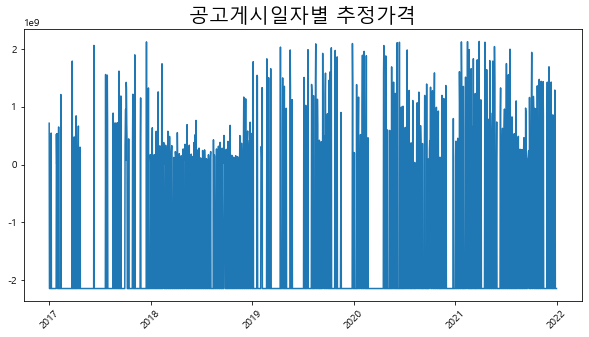

In [14]:
pivot = pd.pivot_table(data=df, index='공고게시일자', values='추정가격',aggfunc='sum').reset_index()
pivot['추정가격'] = pivot['추정가격'].astype(int)

fig = plt.figure(figsize=(10,5)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(pivot['공고게시일자'],pivot['추정가격']) ## 선그래프 생성
 
plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 40도 회전 
plt.title('공고게시일자별 추정가격',fontsize=20) ## 타이틀 설정
plt.show()
#위와 같은 결과
#plt.plot("공고게시일자", "추정가격",data=pivot,color='green')
#plt.show()


In [47]:
import statsmodels.tsa.api as tsa

In [16]:
#model_series = tsa.seasonal_decompose(df,model='additive')

# 모델 시각화
#fig = model_series.plot()
#plt.show()

In [17]:
#df_reduce = pd.DataFrame(data= df,columns = ['등록유혀])

df_control= pd.DataFrame(data=df, columns = ['공고게시일자','수요기관코드','추정가격',"Month",'입찰계약방법축소','대상'])
df_control_sample = pd.DataFrame(data=df_control)

df_control_sample_build=df_control_sample[df_control_sample.대상 == "공사"].loc[:300000]
df_control_sample_build

,공고게시일자,수요기관코드,추정가격,Month,입찰계약방법축소,대상
0,2017-01-02,9220014,61303000.0,NaN,수의,공사
1,2017-01-02,5590000,63636364.0,NaN,수의,공사
2,2017-01-02,8790030,25040000.0,NaN,지역제한,공사
3,2017-01-02,7530542,6570000.0,NaN,수의,공사
4,2017-01-02,5380000,46411819.0,NaN,수의,공사
...,...,...,...,...,...,...
299996,2019-05-13,8371000,810195454.0,NaN,제한경쟁,공사
299997,2019-05-13,3740000,89636364.0,NaN,수의,공사
299998,2019-05-13,8781000,351670000.0,NaN,지역제한,공사
299999,2019-05-13,5190000,214527273.0,NaN,지역제한,공사


In [18]:
X=pd.get_dummies(df_control_sample_build.drop(columns=["수요기관코드","공고게시일자"])) #ont-hot encoding
Y=df_control_sample_build["추정가격"]

X

,추정가격,Month,입찰계약방법축소_1등급,입찰계약방법축소_7등급,입찰계약방법축소_수의,입찰계약방법축소_수의계약,입찰계약방법축소_실적제한,입찰계약방법축소_제한경쟁,입찰계약방법축소_지역제한,대상_공사
0,61303000.0,NaN,0,0,1,0,0,0,0,1
1,63636364.0,NaN,0,0,1,0,0,0,0,1
2,25040000.0,NaN,0,0,0,0,0,0,1,1
3,6570000.0,NaN,0,0,1,0,0,0,0,1
4,46411819.0,NaN,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
299996,810195454.0,NaN,0,0,0,0,0,1,0,1
299997,89636364.0,NaN,0,0,1,0,0,0,0,1
299998,351670000.0,NaN,0,0,0,0,0,0,1,1
299999,214527273.0,NaN,0,0,0,0,0,0,1,1


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #교차검증
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)

import pandas as pd
import numpy as np

X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.25,random_state=5000) 
print(X_train.shape) #row, col 
print(X_test.shape)
print(Y_train.shape) # row 갯수
print(Y_test.shape)



(225000, 10)
(75001, 10)
(225000,)
(75001,)


In [35]:
xgbr = XGBRegressor(verbosity=0) # verbosity : 상세한 로깅logging 을 출력 할지 말지를 조정하는 parameter
#print(xgbr)


import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]




xgbr.fit(X_train,Y_train)
score= xgbr.score(X_train,Y_train)
print("Training score: ",score) # -> '입찰계약방법',

Y_test

Training score:  0.9999942389508768


39957      17187273.0
177650    166796364.0
296793    305909091.0
205649     93863636.0
245259     94000000.0
             ...     
119307     46363637.0
35614      46790909.0
264263     13140000.0
228278     52096363.0
56719      22634546.0
Name: 추정가격, Length: 75001, dtype: float64

In [34]:
ypred = xgbr.predict(X_test)
mse = mean_squared_error(Y_test,ypred)
print("MSE:",mse) # MSE: 추측값에 대한 정확도 측정, 정답에 가까울수록 작은 값 출력
print("RMSE:",mse*(1/2.0))# RMSE : 추정 값 또는 모델이 예측한 값과 실제 환경에서 관찰되는 값의 차이를 다룰 때 흔히 사용하는 측도이다.

MSE: 3518572672604.0527
RMSE: 1759286336302.0264


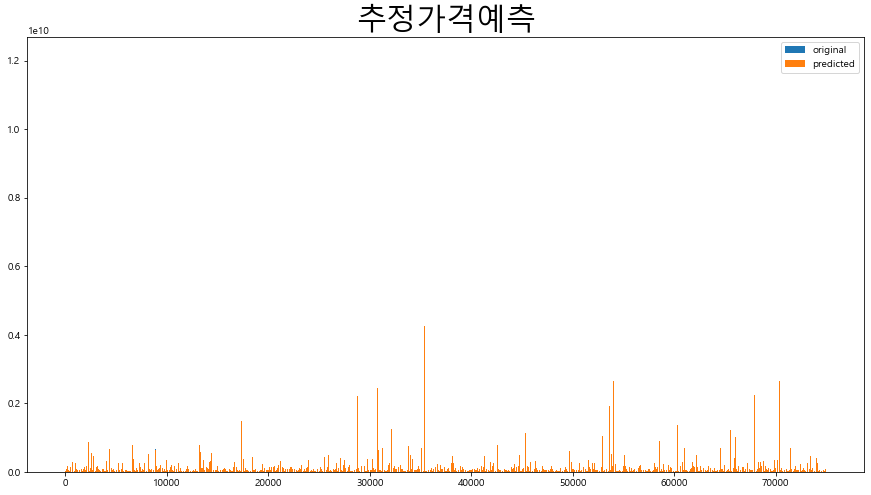

In [63]:
x_ax= range(len(Y_test))
plt.bar(x_ax,Y_test,label="original")
plt.bar(x_ax,ypred, label ="predicted")
plt.title("추정가격예측",fontsize=30)
plt.legend()
plt.show()

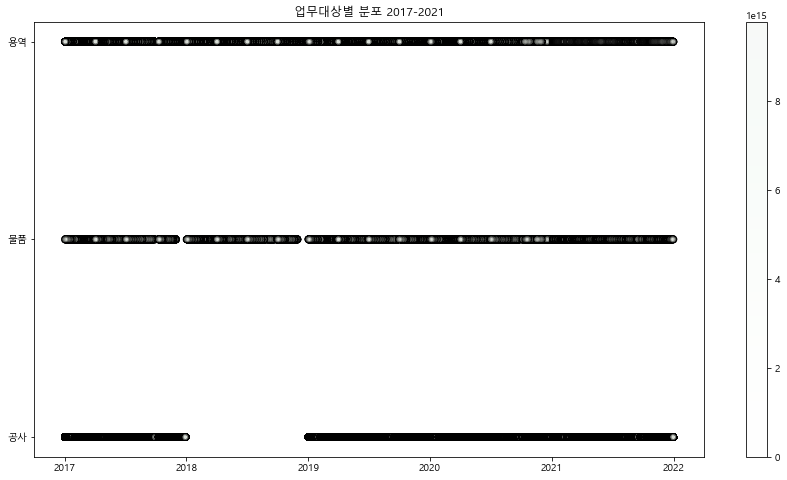

In [23]:
colors = np.random.rand(3)

plt.scatter("공고게시일자","대상",data=df,alpha=0.03,c="추정가격",cmap='Greens',edgecolors='black',linewidth=2)
plt.colorbar()
plt.title("업무대상별 분포 2017-2021")
plt.show()

In [58]:
df_control_sample[df_control_sample.수요기관코드 == "9220014"]
df

AttributeError: 'DataFrame' object has no attribute '수요기관명'

In [38]:
df_smple_heanam = df[df.수요기관코드 == "4930000"]
df_smple_heanam.대상.value_counts()

공사    5039
용역     667
물품      98
Name: 대상, dtype: int64

In [39]:
df_smple_heanam_build = df_smple_heanam[df_smple_heanam.대상 == "공사"]
df_smple_heanam_item = df_smple_heanam[df_smple_heanam.대상 == "물품"]
df_smple_heanam_service = df_smple_heanam[df_smple_heanam.대상 == "용역"]

#df_smple_heanam_build.autocorr(lag=1)

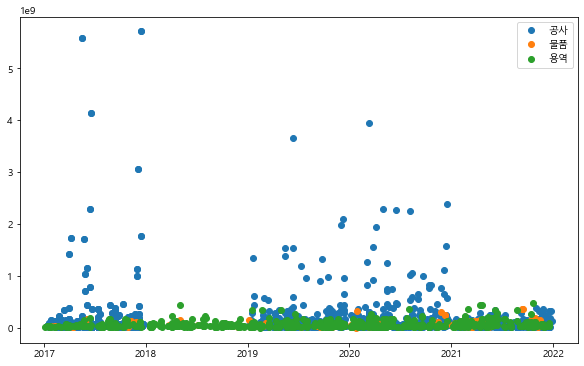

In [78]:
fig = plt.figure(figsize=(10,6))
fig.set_facecolor('white')
plt.scatter(df_smple_heanam_build['공고게시일자'],df_smple_heanam_build['추정가격'],label = "공사")
plt.scatter(df_smple_heanam_item['공고게시일자'], df_smple_heanam_item['추정가격'],label ="물품")
plt.scatter(df_smple_heanam_service['공고게시일자'], df_smple_heanam_service['추정가격'],label = "용역")
plt.legend()

#plt.title("전라남도 해남군  2017-2021 전체",fontsize=20)
#plt.show()

# 전체데이터셋에서 수요기관명, 대상, Month, YEAR로 추정가격 확인

In [41]:
df['Month'] = df['공고게시일자'].dt.month
df['YEAR'] = df['공고게시일자'].dt.year 
summary=df.groupby(['수요기관명', '대상','week'],as_index=False).추정가격.sum()

In [66]:
summary_test=pd.DataFrame(data=summary)

In [67]:
summary_test.sort_values(by=['추정가격','수요기관명'], axis=0, ascending=False)

,수요기관명,대상,week,추정가격
194622,전라북도교육청 군산명화학교,용역,5,9.773637e+15
217808,충청남도아산교육청 아산중학교,용역,50,1.966818e+15
34597,경기도교육청 부흥고등학교,용역,22,1.653160e+11
200870,제주특별자치도,공사,15,9.963470e+10
5890,강원도 원주시,용역,50,9.708804e+10
...,...,...,...,...
2597,강동경희대학교병원,공사,25,0.000000e+00
2598,강동경희대학교병원,공사,27,0.000000e+00
2599,강동경희대학교병원,공사,46,0.000000e+00
1052,(재)세종시문화재단,용역,39,0.000000e+00


In [68]:
summary_test.대상.value_counts()

용역    97533
공사    87212
물품    61846
Name: 대상, dtype: int64

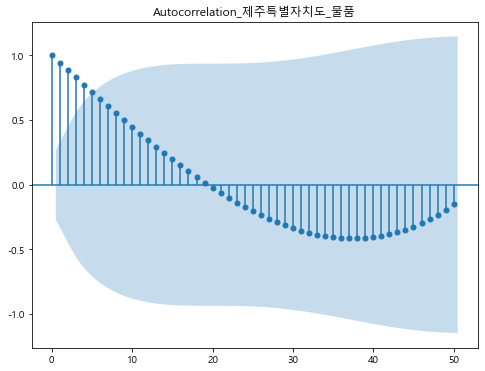

In [76]:
#summary_test.수요기관명.value_counts()
summary_test_item=summary_test[summary_test.대상=='물품']
summary_test_item.수요기관명.value_counts()

jeju=summary_test_item[summary_test_item.수요기관명 == "제주특별자치도"]

import numpy as np
sm.tsa.stattools.acf(jeju['week'], nlags=50, fft=False)
fig = plt.figure(figsize=(8,6))
fig.set_facecolor('white')
ax = fig.add_subplot()
sm.graphics.tsa.plot_acf(jeju['week'], lags=50, ax=ax)
plt.title("Autocorrelation_제주특별자치도_물품")
plt.show()

## 대상별로 자기상관확인

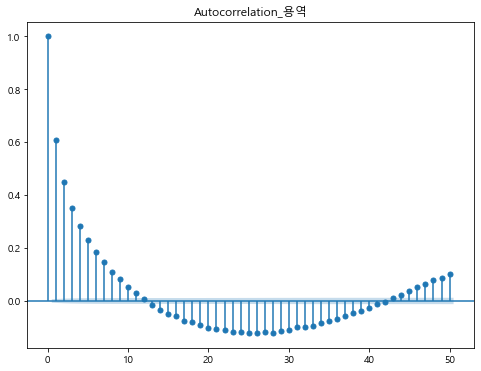

In [73]:
summary_test_build=summary_test[summary_test.대상=='공사']

import numpy as np
sm.tsa.stattools.acf(summary_test_build['week'], nlags=50, fft=False)
fig = plt.figure(figsize=(8,6))
fig.set_facecolor('white')
ax = fig.add_subplot()
sm.graphics.tsa.plot_acf(summary_test_build['week'], lags=50, ax=ax)
plt.title("Autocorrelation_용역")
plt.show()

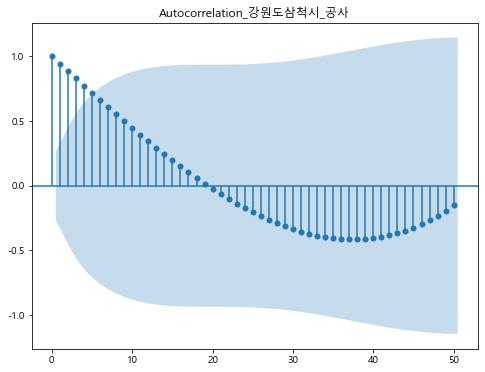

In [77]:
kangwondo_samchuck=summary_test_build[summary_test_build.수요기관명 == "강원도 삼척시"]

import numpy as np
sm.tsa.stattools.acf(kangwondo_samchuck['week'], nlags=50, fft=False)
fig = plt.figure(figsize=(8,6))
fig.set_facecolor('white')
ax = fig.add_subplot()
sm.graphics.tsa.plot_acf(kangwondo_samchuck['week'], lags=50, ax=ax)
plt.title("Autocorrelation_강원도삼척시_공사")
plt.show()

In [ ]:
sm.tsa.stattools.pacf(summary_test_build['week'], nlags=50, method='ywm')
fig = plt.figure(figsize=(8,6))
fig.set_facecolor('white')
ax = fig.add_subplot()
sm.graphics.tsa.plot_pacf(summary_test_build['week'], lags=50, ax=ax)
plt.title("Partial Autocorrelation_공사")
plt.show()

# 전체자기상관분석 
- 양의 값 : 추세를 따라서 계속 증가하는 경향이 있다는 뜻
- 음의 값 : 음의 자기상관은 과거 값이 평균보다 높으면 새로운 값이 평균보다 낮을 가능성이 더 높다는 것을 의미합니다(또는 그 반대). 

## ACF(자기상관함수, AutoCorrelation Function)

시차에 따른 일련의 자기상관을 의미하며, 시차가 커질수록 ACF는 0에 가까워진다.
정상시계열은 상대적으로 빠르게 0으로 수렴하며, 비정상 시계열은 천천히 감소하고, 종종 큰 양의 값을 가진다.

### ACF는 정상성을 판단하는데 유용하다.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
 
import numpy as np
sm.tsa.stattools.acf(summary_test['week'], nlags=50, fft=False)

array([ 1.        ,  0.63784   ,  0.43678296,  0.31343922,  0.23234243,
        0.17508901,  0.13023422,  0.09517924,  0.06930931,  0.04508743,
        0.0268    ,  0.00983978, -0.00286913, -0.01386911, -0.02203948,
       -0.02663058, -0.03245264, -0.0368622 , -0.04128148, -0.04308146,
       -0.0435681 , -0.04592828, -0.0469413 , -0.04729132, -0.04515037,
       -0.04597628, -0.04381847, -0.0416388 , -0.03920861, -0.03861248,
       -0.03492151, -0.02877414, -0.02172512, -0.01599389, -0.00900584,
       -0.00220005,  0.00497881,  0.01212915,  0.01983749,  0.02667631,
        0.03495794,  0.04336914,  0.05100769,  0.05921529,  0.06549615,
        0.07403354,  0.0797442 ,  0.08674791,  0.09209544,  0.09629494,
        0.10055407])

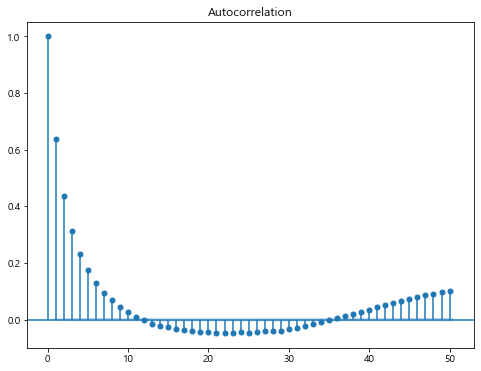

In [72]:
fig = plt.figure(figsize=(8,6))
fig.set_facecolor('white')
ax = fig.add_subplot()
sm.graphics.tsa.plot_acf(summary_test['week'], lags=50, ax=ax)
plt.show()

## PACF(편자기상관함수, Partial AutoCorrelationFunction)

시차에 따른 일련의 편자기상관이며, 시차가 다른 두 시계열 데이터 간의 순수한 상호 연관성이다.

In [ ]:
sm.tsa.stattools.pacf(summary_test['week'], nlags=50, method='ywm')

In [ ]:
fig = plt.figure(figsize=(8,6))
fig.set_facecolor('white')
ax = fig.add_subplot()
sm.graphics.tsa.plot_pacf(summary_test['week'], lags=50, ax=ax)
plt.show()

In [61]:
kang_won_do_won_ju=summary_test[summary_test.수요기관명 == '강원도 원주시']
kang_won_do_won_ju.대상.value_counts()
kang_won_do_won_ju

,수요기관명,대상,week,추정가격
5750,강원도 원주시,공사,1,1.026798e+09
5751,강원도 원주시,공사,2,4.812327e+09
5752,강원도 원주시,공사,3,6.053011e+09
5753,강원도 원주시,공사,4,4.434234e+09
5754,강원도 원주시,공사,5,2.458687e+09
...,...,...,...,...
5888,강원도 원주시,용역,48,7.886832e+10
5889,강원도 원주시,용역,49,1.975912e+09
5890,강원도 원주시,용역,50,9.708804e+10
5891,강원도 원주시,용역,51,2.438094e+10


In [ ]:
pd.options.display.float_format = '{:.3f}'.format

df_groupby_company_name=df.groupby(['수요기관명','대상','week'],as_index=False).추정가격.sum()
df_groupby_company_name

#plt.bar("week","추정가격",data=df_groupby_company_name)

df_groupby_name=df_groupby_company_name[df_groupby_company_name.수요기관명 == "제주특별자치도"]

df_groupby_name.대상.value_counts()


df_group_name_kind_b=df_groupby_name[df_groupby_name.대상=="공사"]
df_group_name_kind_i=df_groupby_name[df_groupby_name.대상=="물품"]
df_group_name_kind_s=df_groupby_name[df_groupby_name.대상=="용역"]


plt.plot("week","추정가격",data=df_group_name_kind_b,label="공사")
plt.plot("week","추정가격",data=df_group_name_kind_i,label="물품")
plt.plot("week","추정가격",data=df_group_name_kind_s,label="용역")
plt.legend()
plt.title("경기도하남시 2017-2021")
plt.show()


In [ ]:
# GDP : 1,835,698.2 / 1,898,192.6 / 1,924,498.1 / 1,933,152.4 / 
# 경제성장률(실질GDP성장률) : 3.2 / 2.9 / 2.2/ -0.9 / 4.0

In [ ]:
df_group_name_kind_i.추정가격.plot()

In [ ]:
# X축에 공고게시일자
# Y축에 추정가격합계
# 대상별로 

In [2]:
#f, ax = plt.subplots(1,1,figsize=(16,8))
#ample_df.plot(x='공고게시일자', y='추정가격', marker='o', ax=ax)
#sample_df_df.plot(x='공고게시일자', y='추정가격', marker='o', ax=ax)
#plt.grid(True)
#plt.show()